In [145]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [146]:
dataset = pd.read_csv('C:\softwares\dataset\SocialNetworkAds.csv')
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [147]:
dataset.describe(include="all")

,User ID,Gender,Age,EstimatedSalary,Purchased
count,4.000000e+02,400,400.000000,400.000000,400.000000
unique,NaN,2,NaN,NaN,NaN
top,NaN,Female,NaN,NaN,NaN
freq,NaN,204,NaN,NaN,NaN
mean,1.569154e+07,NaN,37.655000,69742.500000,0.357500
std,7.165832e+04,NaN,10.482877,34096.960282,0.479864
min,1.556669e+07,NaN,18.000000,15000.000000,0.000000
25%,1.562676e+07,NaN,29.750000,43000.000000,0.000000
50%,1.569434e+07,NaN,37.000000,70000.000000,0.000000
75%,1.575036e+07,NaN,46.000000,88000.000000,1.000000


In [148]:
pd.isnull(dataset).sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

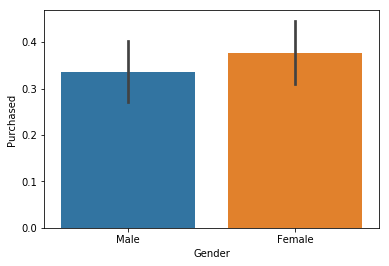

In [149]:
sns.barplot(x="Gender", y="Purchased", data=dataset)

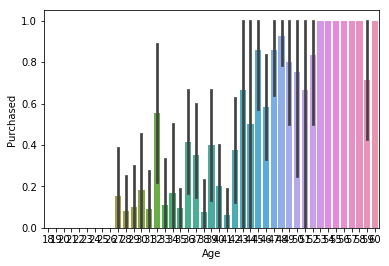

In [150]:
sns.barplot(x="Age", y="Purchased", data=dataset)

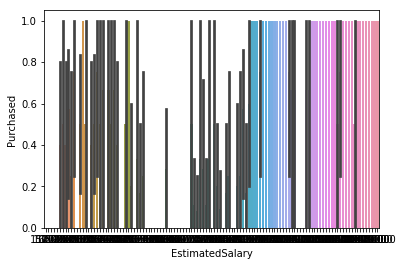

In [151]:
sns.barplot(x="EstimatedSalary", y="Purchased", data=dataset)

In [152]:
gender_map = {'Male':0, 'Female':1}
dataset['Gender'] = dataset['Gender'].map(gender_map)

In [153]:
dataset.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [154]:
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,0,19,19000,0
1,15810944,0,35,20000,0
2,15668575,1,26,43000,0
3,15603246,1,27,57000,0
4,15804002,0,19,76000,0


In [171]:
from sklearn.utils import shuffle
dataset=shuffle(dataset)
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
23,15599081,1,45,22000,1
124,15678168,1,41,51000,0
266,15721592,0,40,75000,0
248,15730688,0,41,52000,0
216,15636023,0,49,65000,0


In [177]:
y = dataset['Purchased']
x= dataset.drop(["User ID","Purchased"], axis=1)

In [178]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
lr= LogisticRegression()
gbc = GradientBoostingClassifier()

In [179]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [180]:
x.head()

,Gender,Age,EstimatedSalary
23,1,45,22000
124,1,41,51000
266,0,40,75000
248,0,41,52000
216,0,49,65000


In [190]:
y.head()

23     1
124    0
266    0
248    0
216    0
Name: Purchased, dtype: int64

In [191]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [192]:
lr.fit(x_train,y_train)
lr.score(x_train,y_train)

0.8625

In [193]:
lr.score(x_test,y_test)

0.8125

In [198]:
testPred = lr.predict(x_test)

In [199]:
gbc.fit(x_train,y_train)
gbc.score(x_train,y_train)

0.98125

In [200]:
gbc.score(x_test,y_test)

0.825

In [201]:
gbc.predict(x_test)

array([0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0], dtype=int64)

In [205]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, testPred)

array([[41,  6],
       [ 9, 24]], dtype=int64)